# NeuroGym

NeuroGym is a comprehensive toolkit that allows training any network model on many established neuroscience tasks using Reinforcement Learning techniques. It includes working memory tasks, value-based decision tasks and context-dependent perceptual categorization tasks.

In this notebook we first show how to install the relevant toolbox. 

We then show how to access the available tasks and their relevant information.

Finally we train the A2C algorithm [Mnih et al. 2016](https://arxiv.org/abs/1602.01783) on the Random Dots Motion task, using the [stable-baselines](https://github.com/hill-a/stable-baselines) toolbox, and plot the results.

You can easily change the code to train a network on any other available task or using a different algorithm (e.g. ACER, PPO2).

In [0]:
%tensorflow_version 1.x

# Install Gym and NeuroGym

In [2]:
! pip install gym

# Install NeuroGym

In [3]:
! git clone https://github.com/gyyang/neurogym.git

Cloning into 'neurogym'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 5113 (delta 60), reused 60 (delta 23), pack-reused 4995
Receiving objects: 100% (5113/5113), 4.01 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (3662/3662), done.


In [4]:
cd neurogym

/content/neurogym


In [5]:
pip install -e .

Obtaining file:///content/neurogym
  Running setup.py develop for neurogym


# Install Stable-Baselines

In [6]:
cd /content

/content


In [7]:
! git clone https://github.com/hill-a/stable-baselines.git

Cloning into 'stable-baselines'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 8970 (delta 23), reused 16 (delta 7), pack-reused 8918
Receiving objects: 100% (8970/8970), 9.56 MiB | 28.63 MiB/s, done.
Resolving deltas: 100% (6743/6743), done.


In [8]:
! apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [9]:
cd stable-baselines/

/content/stable-baselines


In [10]:
pip install --upgrade stable-baselines

     |████████████████████████████████| 235kB 3.0MB/s 
  Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


# Access tasks info

In [11]:
cd /content/neurogym/

/content/neurogym


In [0]:
from neurogym.meta import tasks_info

In [13]:
tasks_info.info()

### List of environments implemented


* 24 tasks implemented so far.


* Under development, details subject to change


AngleReproduction-v0
AntiReach-v0
Bandit-v0
Combine-v0
DPA-v0
DawTwoStep-v0
DelayedMatchCategory-v0
DelayedMatchSample-v0
DelayedMatchToSampleDistractor1D-v0
DelayedResponse-v0
GNG-v0
IntervalDiscrimination-v0
Mante-v0
MatchingPenny-v0
MemoryRecall-v0
MotorTiming-v0
NAltRDM-v0
RDM-v0
Reaching1D-v0
Reaching1DWithSelfDistraction-v0
ReadySetGo-v0
Romo-v0
padoaSch-v0
pdWager-v0



#### Example trials ####


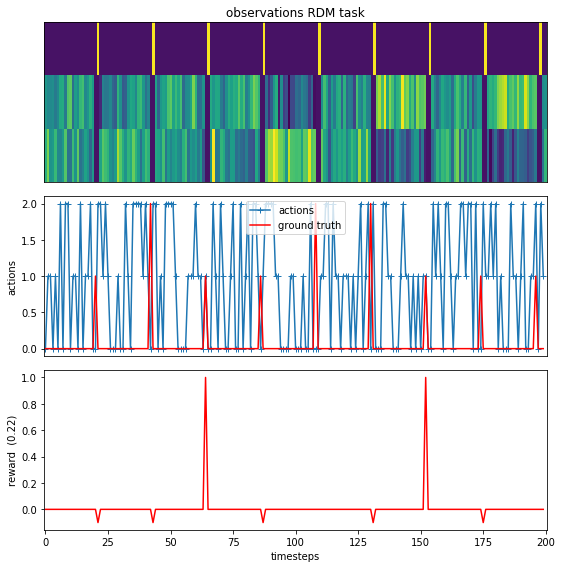

### RDM task ###

Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average

Reference paper: 

[The analysis of visual motion: a comparison of
        neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)

Default Epoch timing (ms) 

fixation : constant 100

stimulus : constant 2000

decision : constant 100

stimEv : 1.0


#### Source code #### 

class RDM(ngym.EpochEnv):
    metadata = {
        'description': '''Random dot motion task. Two-alternative forced
         choice task in which the subject has to integrate two stimuli to
         decide which one is higher on average''',
        'paper_link': 'https://www.jneurosci.org/content/12/12/4745',
        'paper_name': '''The analysis of visual motion: a comparison of
        neuronal and psychophysical performance''',
        'timing': {
            'fixation': ('constant', 100),  # TODO: 

In [14]:
tasks_info.info('RDM-v0', show_code=True)

# Example

In [15]:
import gym
import neurogym
from neurogym.meta import tasks_info
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
task = 'RDM-v0'
KWARGS = {'dt': 100, 'timing': {'fixation': ('constant', 200), 'stimulus': ('constant', 500), 'decision': ('constant', 200)}}

env = gym.make('RDM-v0', **KWARGS)
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])

model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
model.learn(total_timesteps=500000, log_interval=10000)
env.close()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.151    |
| fps                | 2        |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 0.00184  |
---------------------------------
-------

# Visualize results

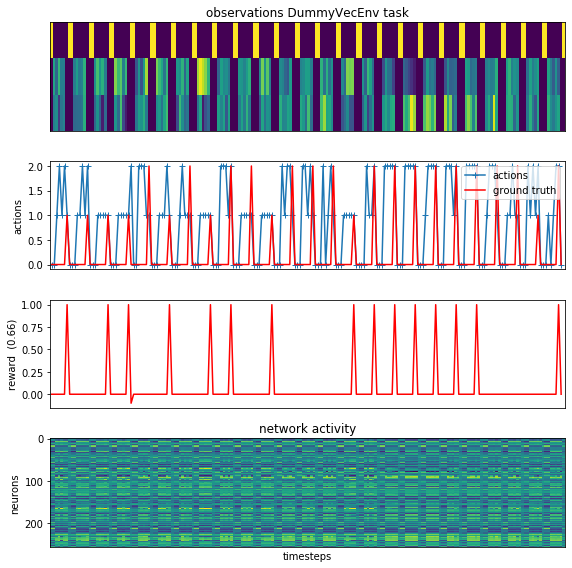

In [17]:
env = gym.make('RDM-v0', **KWARGS)
env = DummyVecEnv([lambda: env])
data = tasks_info.plot_struct(env, num_steps_env=10000, n_stps_plt=200,
                                model=model)
